In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [3]:
df = pd.read_csv(csv_path)

In [4]:
df.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4e2f1ea90>],
      dtype=object)

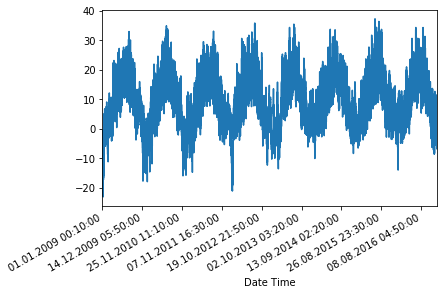

In [5]:

plot_df = df['T (degC)']
plot_df.index = df['Date Time']
plot_df.plot(subplots=True)


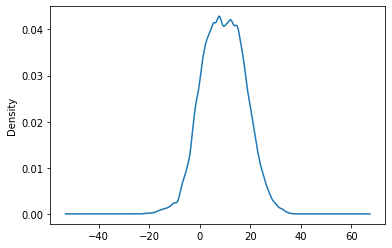

In [6]:
plot_df.plot(kind='kde')

In [7]:
df_s = pd.DataFrame({'Date Time':plot_df.index, 'Temperature':plot_df.values})

df_s['Date Time'] = pd.to_datetime(df_s['Date Time'])
df_s = df_s.set_index('Date Time')
df_s.head(100)

,Temperature
Date Time,
2009-01-01 00:10:00,-8.02
2009-01-01 00:20:00,-8.41
2009-01-01 00:30:00,-8.51
2009-01-01 00:40:00,-8.31
2009-01-01 00:50:00,-8.27
...,...
2009-01-01 16:00:00,-5.40
2009-01-01 16:10:00,-5.31
2009-01-01 16:20:00,-5.28


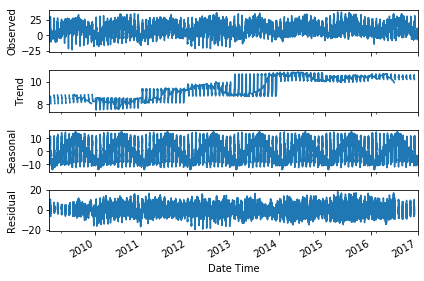

In [8]:
# Need to write frequency calculation
result = seasonal_decompose(df_s, freq=52560)
result.plot()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4c2d60ad0>]],
      dtype=object)

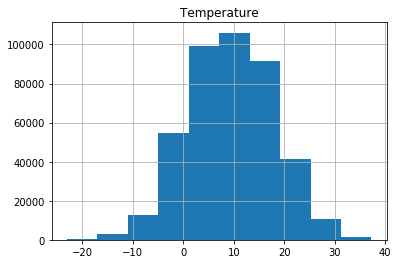

In [9]:
df_s.hist()


# AR Models

## Lag plot 

Lag plot in pandas plots the value at current time step against the value at previous time step. If the plot has huge clustering along the diagonal it implies that there is a strong correlation between two time steps.

More Explanations at: 
1. https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html
2. https://machinelearningmastery.com/time-series-data-visualization-with-python/

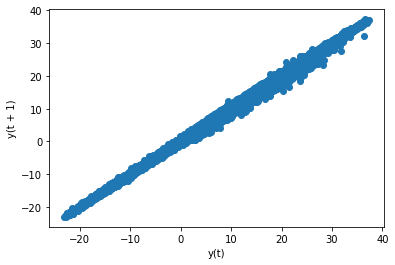

In [12]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(plot_df)
pyplot.show()

## Autocorrelation Plot

This plot shows the strength and type of relationship between observations and their lags.

A correlation value calculated between two groups of numbers, such as observations and their lag1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.

The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful).

We can see that for the Minimum Daily Temperatures dataset we see cycles of strong negative and positive correlation. This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

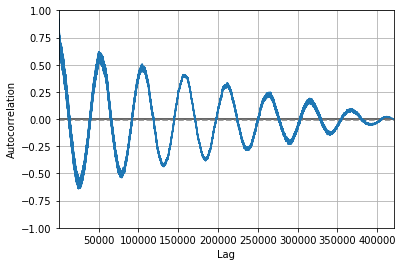

In [15]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(plot_df)
pyplot.show()

The statsmodels library also provides a version of the plot in the plot_acf() function as a line plot.

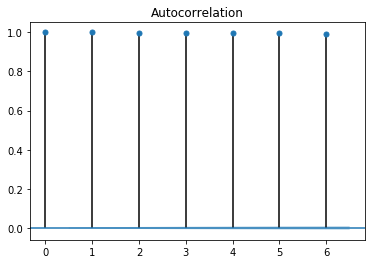

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(plot_df, lags=6)
pyplot.show()

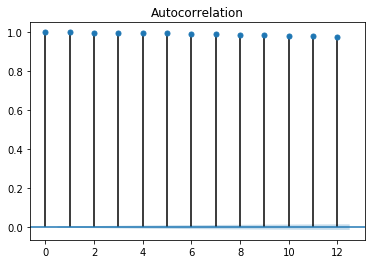

In [19]:
plot_acf(plot_df, lags=12)
pyplot.show()

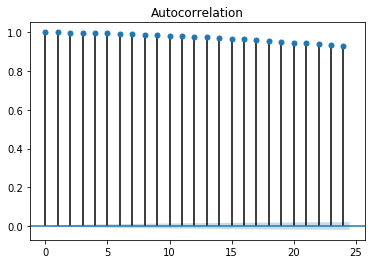

In [20]:
plot_acf(plot_df, lags=24)
pyplot.show()